In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import warnings
warnings.filterwarnings(action='ignore')

In [26]:
#기준시점(2015년=100)의 가격수준이 다르기 때문에 지역별 소비자물가지수를 이용하여 지역별 상대적인 물가수준 차이를 비교하는 것은 부적절함
# * 2015년 기준 가중치로서 2014년 이전 자료는 동일 가중치를 적용할 수 없음

In [27]:
df_data = pd.read_csv('./data/소비자물가지수(지출목적별)_20240803150211.csv')
df_data.head()

,시점,총지수,식료품 및 비주류음료,주류·담배,의복·신발,주택·수도·전기 및 연료,가정용품 및 가사서비스,보건,교통,통신,오락 및 문화,교육,음식 및 숙박,기타 상품 및 서비스
0,2018. 01,97.84,93.60,98.79,97.89,97.97,94.47,98.56,101.54,104.92,99.63,100.45,95.35,95.77
1,2018. 02,98.55,96.60,99.11,98.44,98.14,95.22,98.53,101.72,104.79,101.21,100.75,95.73,96.46
2,2018. 03,98.54,95.11,98.88,98.51,98.32,97.29,98.60,101.56,104.68,100.89,100.96,96.16,96.64
3,2018. 04,98.77,95.63,98.83,98.49,98.32,96.75,98.20,101.38,105.18,102.73,101.40,96.48,96.81
4,2018. 05,98.78,94.68,98.79,98.53,98.31,97.63,98.16,102.16,105.07,102.95,101.42,96.73,96.51


In [28]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시점             78 non-null     object 
 1   총지수            78 non-null     float64
 2   식료품 및 비주류음료    78 non-null     float64
 3   주류·담배          78 non-null     float64
 4   의복·신발          78 non-null     float64
 5   주택·수도·전기 및 연료  78 non-null     float64
 6   가정용품 및 가사서비스   78 non-null     float64
 7   보건             78 non-null     float64
 8   교통             78 non-null     float64
 9   통신             78 non-null     float64
 10  오락 및 문화        78 non-null     float64
 11  교육             78 non-null     float64
 12  음식 및 숙박        78 non-null     float64
 13  기타 상품 및 서비스    78 non-null     float64
dtypes: float64(13), object(1)
memory usage: 8.7+ KB


In [29]:
df_data.시점.min(), df_data.시점.max()

('2018. 01', '2024. 06')

In [30]:
data = df_data.drop(columns= '시점')
data.index = pd.date_range(start='2018-01-01', end='2024-07-01', freq='ME')
data.head()

,총지수,식료품 및 비주류음료,주류·담배,의복·신발,주택·수도·전기 및 연료,가정용품 및 가사서비스,보건,교통,통신,오락 및 문화,교육,음식 및 숙박,기타 상품 및 서비스
2018-01-31,97.84,93.60,98.79,97.89,97.97,94.47,98.56,101.54,104.92,99.63,100.45,95.35,95.77
2018-02-28,98.55,96.60,99.11,98.44,98.14,95.22,98.53,101.72,104.79,101.21,100.75,95.73,96.46
2018-03-31,98.54,95.11,98.88,98.51,98.32,97.29,98.60,101.56,104.68,100.89,100.96,96.16,96.64
2018-04-30,98.77,95.63,98.83,98.49,98.32,96.75,98.20,101.38,105.18,102.73,101.40,96.48,96.81
2018-05-31,98.78,94.68,98.79,98.53,98.31,97.63,98.16,102.16,105.07,102.95,101.42,96.73,96.51


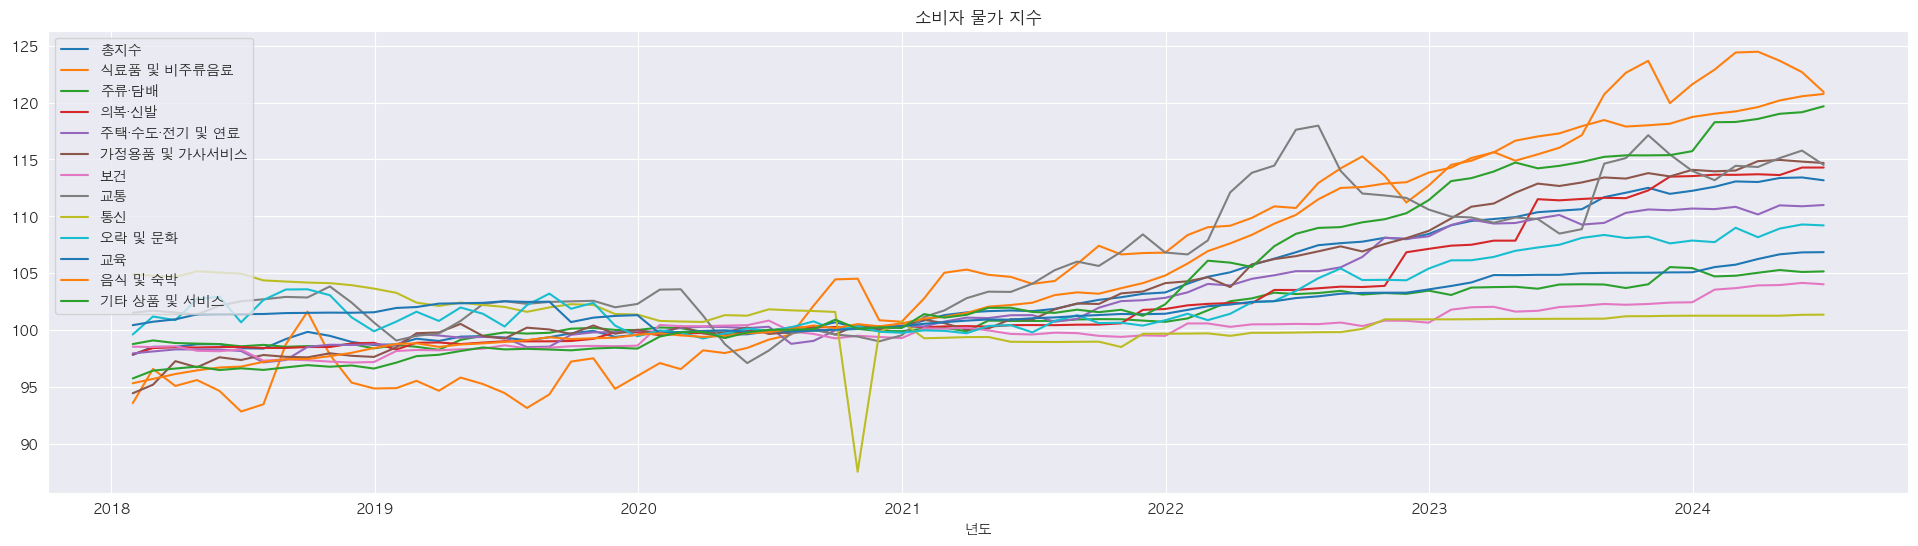

In [31]:
fig, ax = plt.subplots( figsize=(24,6))
ax.plot(data)
ax.legend(data.columns)
ax.set_title("소비자 물가 지수")
ax.set_xlabel("년도")
plt.savefig('consumer_price.png')  
plt.show()


<Axes: >

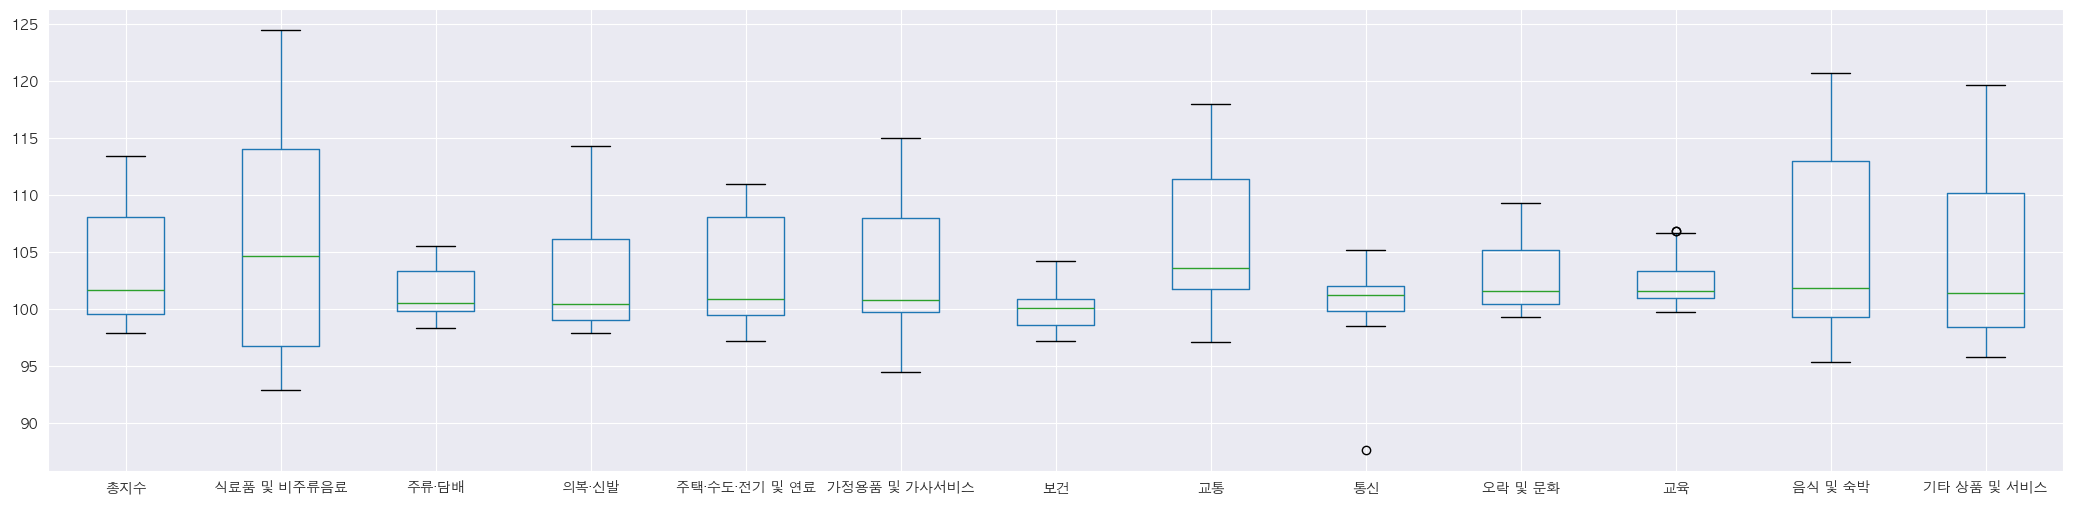

In [32]:
data.boxplot(figsize=(26,6))

<Axes: >

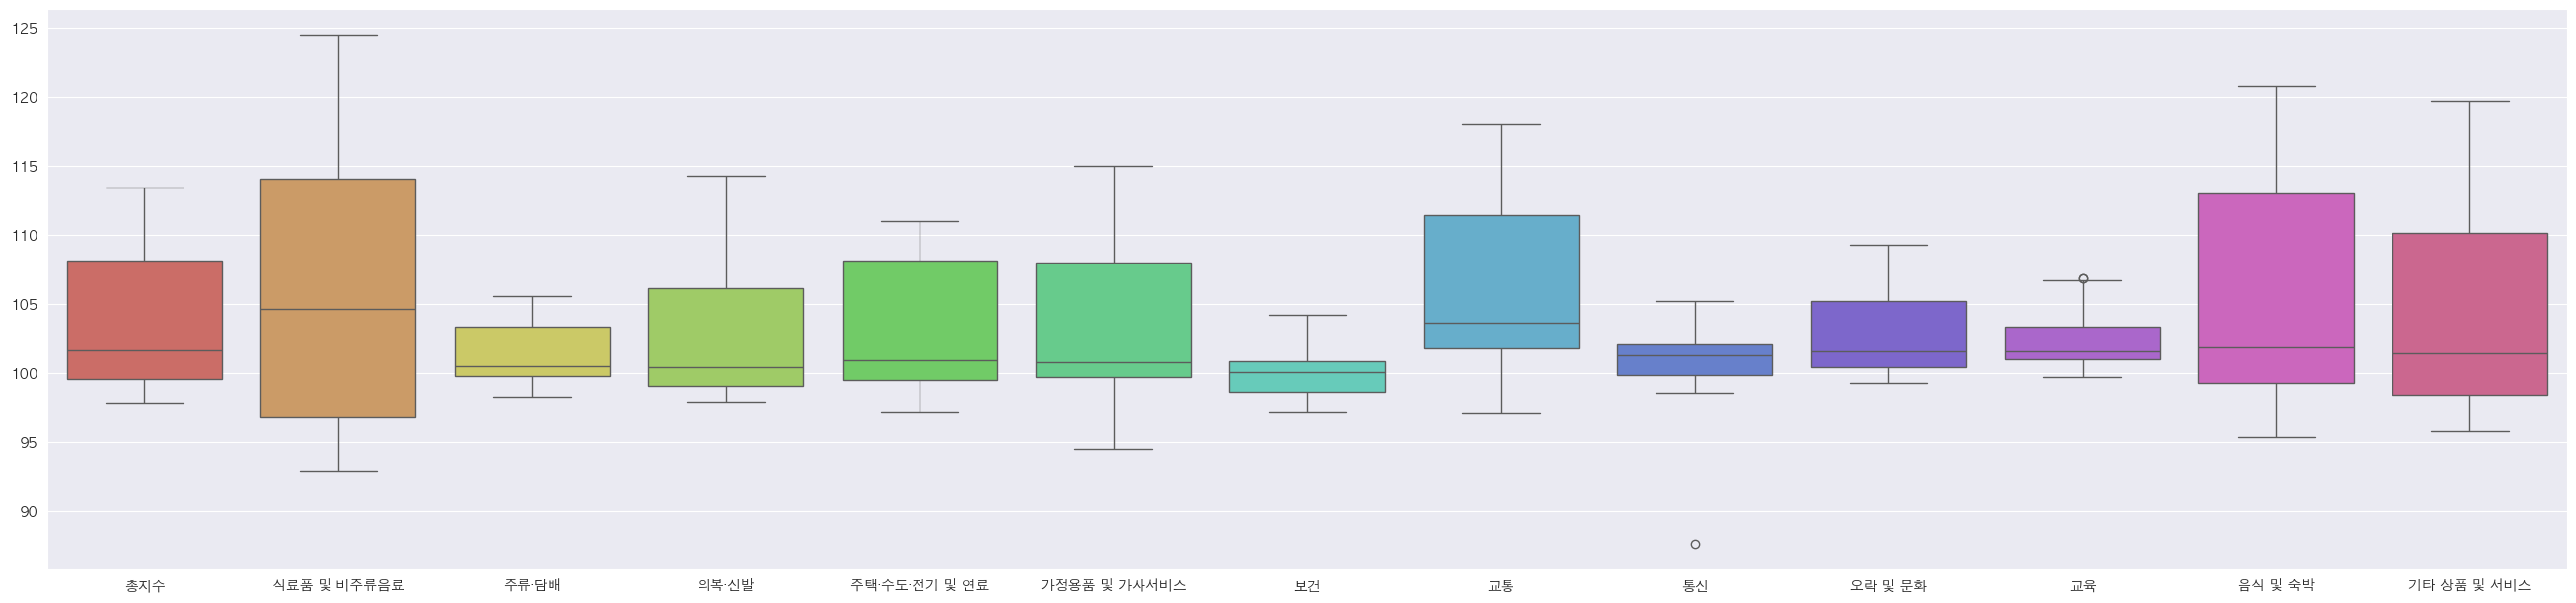

In [33]:
fig = plt.figure(figsize=(26,6), layout='constrained')
sns.boxplot(data=data,  order=data.columns, palette=sns.color_palette('hls', 13) )

<Axes: >

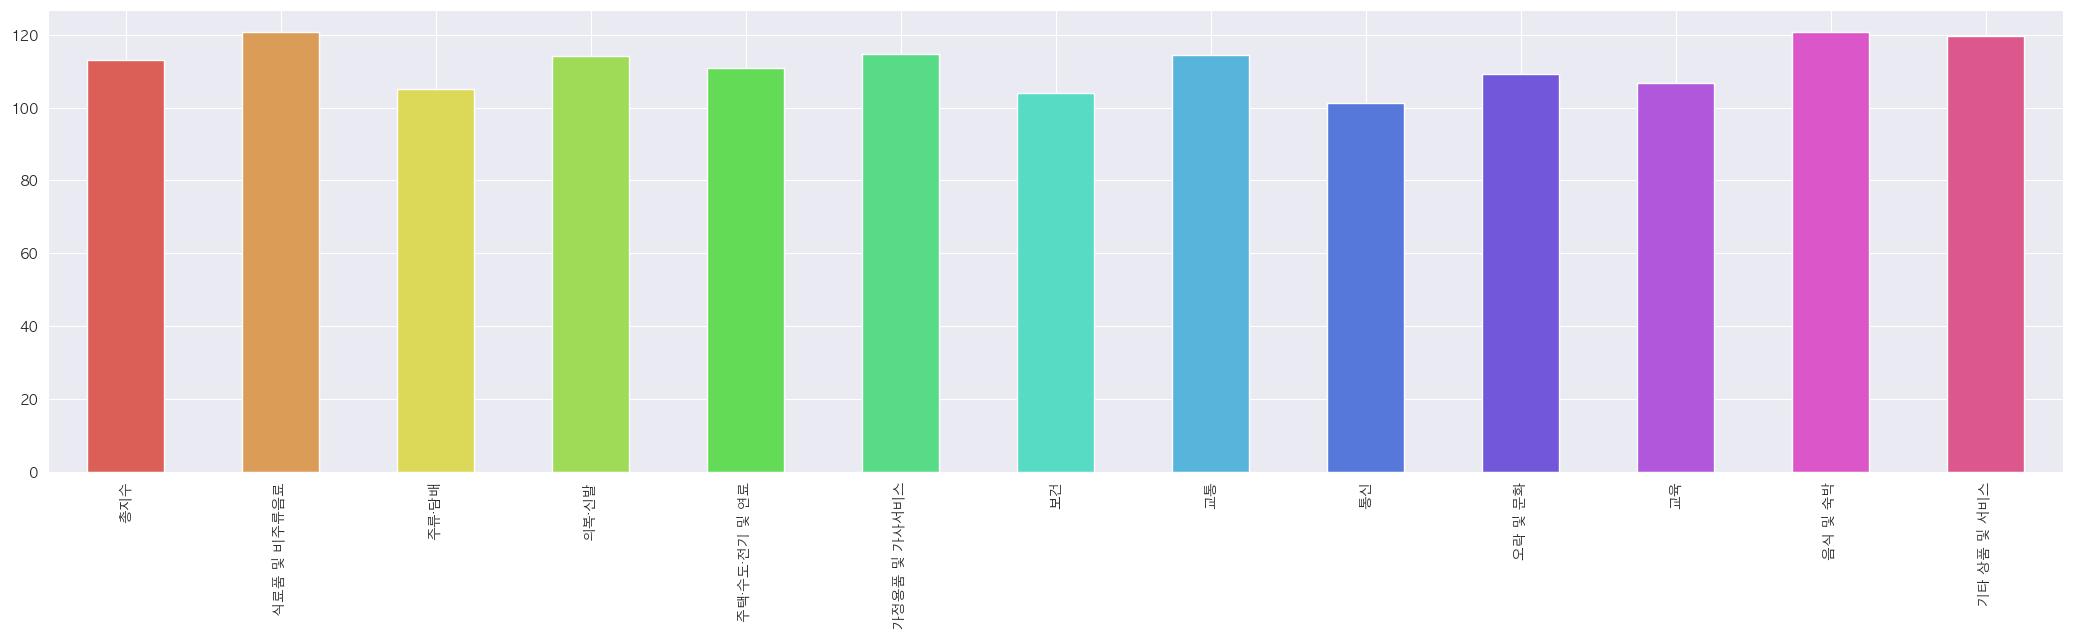

In [34]:
data.loc[data.index.max() ].plot.bar(figsize=(26,6), layout='constrained', color=sns.color_palette('hls', 13))